# Evaluate model for Vietnamese Stock Env

In [1]:
import os
from pathlib import Path
path = Path(os.getcwd())
os.chdir(path.parent.absolute())

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import pandas_ta as ta
from stable_baselines3.dqn import DQN
from stable_baselines3.ppo import PPO
import gym
import matplotlib.pyplot as plt
from stable_baselines3.common.evaluation import evaluate_policy
import mt4_hst
import stock_env
from stock_env.utils import *
from stock_env.envs.vn_stock_env import VietnamStockEnv, VietnamStockV2Env
from stable_baselines3.common.env_checker import check_env
%matplotlib inline

In [42]:
ticker = 'FPT'
df = mt4_hst.read_hst("../stock_datasets/" + ticker + "1440.hst")

In [44]:
env = VietnamStockV2Env(
    df=df,
    max_trade_lot=5,
    max_lot=10,
    init_cash=5e3)
check_env(env)
model = DQN.load("log/dqn_VietnamStockV2Env_" + ticker, env=env)
# model = PPO.load("log/ppo_VietnamStockV2Env_" + ticker, env=env)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [45]:
df = pd.read_csv('temp/history/' + ticker + '.csv')
df.sort_values(by='time', inplace=True)
df.index = pd.to_datetime(df['time'])
portfolio_value = df['portfolio_value']

In [46]:
cols = "time close quantity delta_shares portfolio_value cash nav actions step_reward".split()
df[cols].head(50)

,time,close,quantity,delta_shares,portfolio_value,cash,nav,actions,step_reward
time,,,,,,,,,
2014-02-28,2014-02-28,12.086329,400,400,4975.539780,141.008377,4834.531403,9,-5023.942190
2014-03-03,2014-03-03,11.614206,400,0,4786.690903,141.008377,4645.682526,5,-331.624996
2014-03-04,2014-03-04,11.519782,400,0,4748.921204,141.008377,4607.912827,6,-178.833951
2014-03-05,2014-03-05,11.708631,400,0,4824.460602,141.008377,4683.452225,6,-65.738836
2014-03-06,2014-03-06,11.803055,400,0,4862.230301,141.008377,4721.221924,6,-103.294553
2014-03-07,2014-03-07,11.897479,400,0,4900.000000,141.008377,4758.991623,6,-103.294553
2014-03-10,2014-03-10,11.991904,400,0,4937.770081,141.008377,4796.761703,6,-103.294172
2014-03-11,2014-03-11,12.652875,400,0,5202.158356,141.008377,5061.149979,6,119.900293
2014-03-12,2014-03-12,12.747299,400,0,5239.928055,141.008377,5098.919678,5,-103.294553


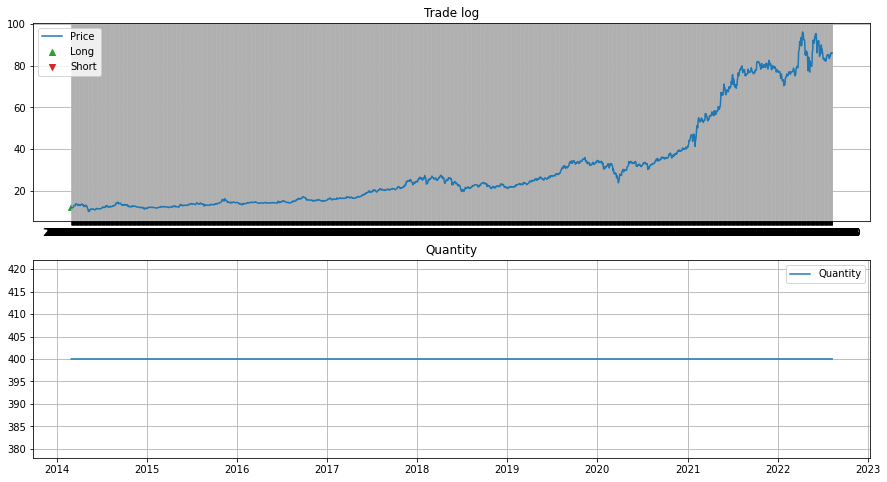

In [37]:
plot_trade_log_v2(df)


    Annual return     :  26.04%
    Cumulative return :  595.02%
    Sharpe ratio      :  1.03
    Maximum Drawdown  : -33.44%
    Annual Volatility :  25.62%
    Value-At-Risk     :  nan%
    


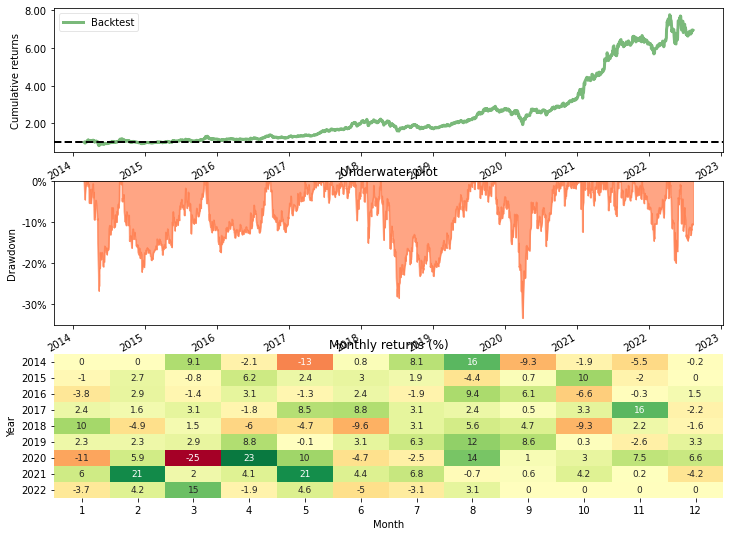

In [38]:
create_performance(portfolio_value.pct_change())